<a href="https://colab.research.google.com/github/lacakp/Project-Fruit-Image-Classification/blob/main/Proj_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


Hi I'm lacakp : )
github: https://github.com/lacakp

- Classification Apple Banana and Tomato

- Transfer Learning Using Keras(ResNet-50)


- Thank you Nachiketa Hebbar youtube tutorial
" Transfer Learning Using Keras(ResNet-50)| Complete Python Tutorial|" very much :)
link: https://www.youtube.com/watch?v=JcU72smpLJk


Transfer Learning คือ เทคนิคที่ช่วยลดเวลาการเทรนโมเดล Deep Learning ด้วยการนำบางส่วนของโมเดลที่เทรนเรียบร้อยแล้ว กับงานที่ใกล้เคียงกัน มาใช้เป็นส่วนหนึ่งของโมเดลใหม่



## Prepare Colab + kaggle (simple version)

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
# https://www.kaggle.com/moltean/fruits
# https://www.kaggle.com/sshikamaru/fruit-recognition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1. Install the Kaggle library
! pip install kaggle

In [ ]:
# 2. Make a directory named “.kaggle”
!mkdir kaggle

In [ ]:
# 3. Copy the “kaggle.json” into this new directory # 4. Allocate the required permission for this file.
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading Competitions dataset:
! kaggle datasets download -d moltean/fruits/fruits-360_dataset

100% 1.28G/1.28G [00:08<00:00, 151MB/s]
100% 1.28G/1.28G [00:08<00:00, 163MB/s]


In [ ]:
# # Create a directory named train,
# ! mkdir train
# # unzip train data there,
# ! unzip fruits.zip -d train
# unzip train data there,

 unzip fruits.zip
! ls

## Prepare Colab + kaggle (use kora)

In [1]:
# https://medium.com/super-ai-engineer/kora-%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%87%E0%B8%A1%E0%B8%B7%E0%B8%AD%E0%B8%94%E0%B8%B5-%E0%B9%86-%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A%E0%B8%84%E0%B8%99%E0%B8%A3%E0%B8%B1%E0%B8%81-google-colab-137c193641c0
!pip install -q kora # https://github.com/korakot/kora

     |████████████████████████████████| 57 kB 2.7 MB/s 
     |████████████████████████████████| 56 kB 3.4 MB/s 


In [2]:
from kora import kaggle
kaggle.search('moltean/fruits')

,ref,title,size,lastUpdated,downloadCount
0,prasunroy/natural-images,Natural Images,342MB,2018-08-11 18:24:11,15712
1,moltean/fruits,Fruits 360,1GB,2021-09-12 19:19:48,76707
2,souro12/ccxzvv,Fruits Images - 5 classes,15MB,2020-04-01 09:49:55,89
3,ztaihong/fruits360v14,fruits360v14,175MB,2019-10-02 06:09:08,80
4,manaralkali/citris,citris,10MB,2021-02-19 21:26:45,0
5,ztaihong/fruits360v14npz,fruits360v14npz,1GB,2019-10-08 03:04:59,31
6,mdhasibulhuq/ai-face-with-mask-without-mask-an...,"AI Face with Mask, without mask and non huma",4GB,2020-11-16 06:41:55,41


In [3]:
kaggle.download('moltean/fruits')

100% 1.28G/1.28G [00:09<00:00, 160MB/s]



#Pipeline
1. Data Acquisition
2. Training The Model
3. Evaluation
4. Prediction
5. Deploy Model

## 1. Data Acquisition

### Check Data

In [ ]:
# !pip install keras
# !pip install tensorflow

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow
import random

In [ ]:
!ls 'fruits-360_dataset/fruits-360/Training'
train_path = 'fruits-360_dataset/fruits-360/Training'

'Apple Braeburn'       'Grape Blue'	     'Pear Monster'
'Apple Crimson Snow'   'Grapefruit Pink'     'Pear Red'
'Apple Golden 1'       'Grapefruit White'    'Pear Stone'
'Apple Golden 2'       'Grape Pink'	     'Pear Williams'
'Apple Golden 3'       'Grape White'	      Pepino
'Apple Granny Smith'   'Grape White 2'	     'Pepper Green'
'Apple Pink Lady'      'Grape White 3'	     'Pepper Orange'
'Apple Red 1'	       'Grape White 4'	     'Pepper Red'
'Apple Red 2'	        Guava		     'Pepper Yellow'
'Apple Red 3'	        Hazelnut	      Physalis
'Apple Red Delicious'   Huckleberry	     'Physalis with Husk'
'Apple Red Yellow 1'    Kaki		      Pineapple
'Apple Red Yellow 2'    Kiwi		     'Pineapple Mini'
 Apricot	        Kohlrabi	     'Pitahaya Red'
 Avocado	        Kumquats	      Plum
'Avocado ripe'	        Lemon		     'Plum 2'
 Banana		       'Lemon Meyer'	     'Plum 3'
'Banana Lady Finger'    Limes		      Pomegranate
'Banana Red'	        Lychee		     'Pomelo Sweetie'
 Beetroot	        Mand

In [ ]:
# ฟังก์ชันสำหรับโหลดภาพเข้ามา
def load_images_from_folder(folder):
    images = [] # สร้าง list สำหรับเก็บภาพ 
    for filename in os.listdir(folder): # ลูปดูภาพใน folder 
        img = cv.imread(os.path.join(folder,filename))  # ทำการอ่านภาพจาก ชื่อภาพ โดย cv.imread เก็บไว้ img 
        if img is not None: # เช็คดูว่าถ้าไม่ได้เป็นค่าว่าง 
            images.append(img) # ให้เก็บไว้ใน list images
    return images # คืนค่าเป็น list Images

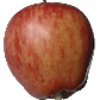

[[[255 253 255]
  [255 253 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
# https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb#scrollTo=6dy-iP-VTibt
""" ทดสอบ เช็คดูข้อมูล """
apple_train = 'fruits-360_dataset/fruits-360/Training/Apple Red 1/' # path ของภาพ แอปเปิล
image = cv.imread(apple_train+'0_100.jpg')  # เลือกมาสัก 1 ภาพ ใน folder Apple Red 1
cv2_imshow(image) # โชว์ภาพ
print(image) # print ดู array

In [ ]:
apple_train = 'fruits-360_dataset/fruits-360/Training/Apple Red 1/' # path Apple images
banana_train = 'fruits-360_dataset/fruits-360/Training/Banana/'     # path banana images
tomato_train = 'fruits-360_dataset/fruits-360/Training/Tomato 1/'   # path tomato images
# ทำการโหลดภาพทุกภาพแล้ว แปลงเป็น array โดย ใช้ฟังก์ชันที่เตรียมไว้ คือ load_images_from_folder 
apple_img = load_images_from_folder(apple_train)  # โหลดภาพ แอปเปิ้ลมา
banana_img = load_images_from_folder(banana_train)  # โหลดภาพ กล้วยมา
tomato_img = load_images_from_folder(tomato_train)  # โหลดภาพ มะเขือเทศมา
# เช็คดูจำนวนภาพ
print("ภาพกล้วยมีอยู่ " + str(len(banana_img)) + " ภาพ")
print("ภาพแอปเปิ้ลมีอยู่ " + str(len(apple_img)) + " ภาพ")
print("ภาพแอปเปิ้ลมีอยู่ " + str(len(tomato_img)) + " ภาพ")

ภาพกล้วยมีอยู่ 490 ภาพ
ภาพแอปเปิ้ลมีอยู่ 492 ภาพ
ภาพแอปเปิ้ลมีอยู่ 738 ภาพ


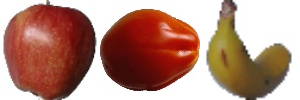

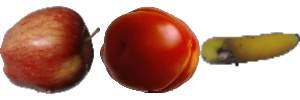

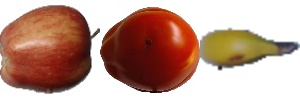

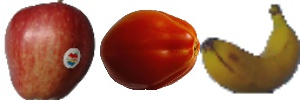

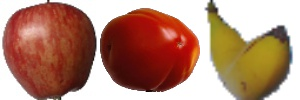

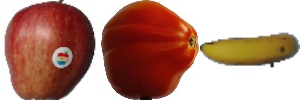

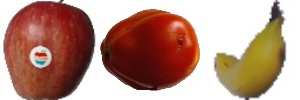

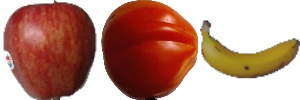

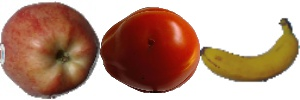

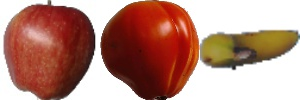

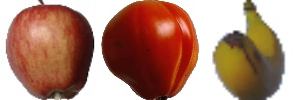

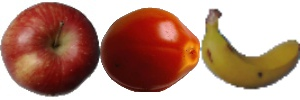

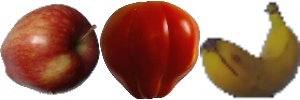

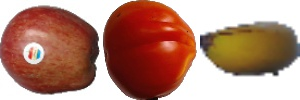

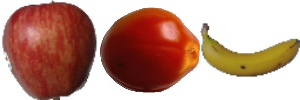

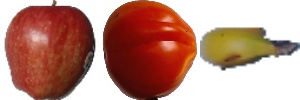

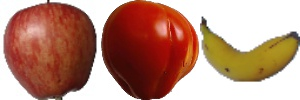

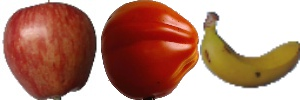

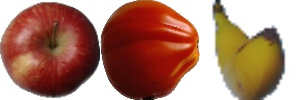

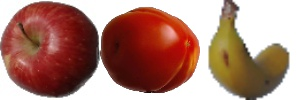

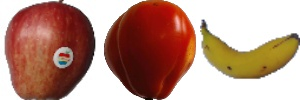

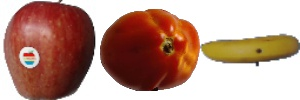

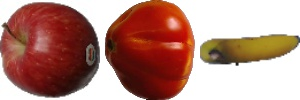

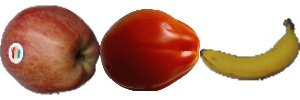

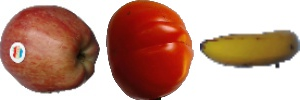

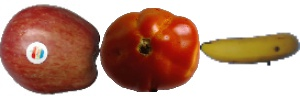

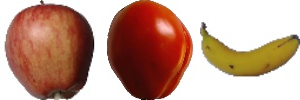

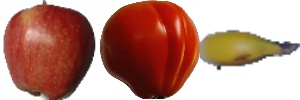

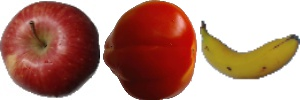

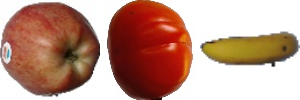

In [ ]:
# สุ่มมาสัก 30 ภาพ
for i in range(30):   
  ran = random.randint(1,489)   # สุ่มโดย พิศัยตัวเลข จาก 1 ถึง 489 ภาพ
  final_frame = cv.hconcat((apple_img[ran], tomato_img[ran], banana_img[ran])) # แสดงภาพ
  cv2_imshow(final_frame) # โชว์ภาพ

### Preparing Data

In [4]:
!ls 'fruits-360_dataset/fruits-360/Training'
train_path = 'fruits-360_dataset/fruits-360/Training'

'Apple Braeburn'       'Grape Blue'	     'Pear Monster'
'Apple Crimson Snow'   'Grapefruit Pink'     'Pear Red'
'Apple Golden 1'       'Grapefruit White'    'Pear Stone'
'Apple Golden 2'       'Grape Pink'	     'Pear Williams'
'Apple Golden 3'       'Grape White'	      Pepino
'Apple Granny Smith'   'Grape White 2'	     'Pepper Green'
'Apple Pink Lady'      'Grape White 3'	     'Pepper Orange'
'Apple Red 1'	       'Grape White 4'	     'Pepper Red'
'Apple Red 2'	        Guava		     'Pepper Yellow'
'Apple Red 3'	        Hazelnut	      Physalis
'Apple Red Delicious'   Huckleberry	     'Physalis with Husk'
'Apple Red Yellow 1'    Kaki		      Pineapple
'Apple Red Yellow 2'    Kiwi		     'Pineapple Mini'
 Apricot	        Kohlrabi	     'Pitahaya Red'
 Avocado	        Kumquats	      Plum
'Avocado ripe'	        Lemon		     'Plum 2'
 Banana		       'Lemon Meyer'	     'Plum 3'
'Banana Lady Finger'    Limes		      Pomegranate
'Banana Red'	        Lychee		     'Pomelo Sweetie'
 Beetroot	        Mand

In [5]:
import os
!pwd
os.mkdir('Train')

/content


In [6]:
# Create Folder
os.mkdir('/content/Train/Apple')
os.mkdir('/content/Train/Tomato')
os.mkdir('/content/Train/Banana')

In [7]:
# copy file to /content/Train/
# Apple
!cp -r '/content/fruits-360_dataset/fruits-360/Training/Apple Red 1/' '/content/Train/Apple'
!cp -r '/content/fruits-360_dataset/fruits-360/Training/Apple Red 2/' '/content/Train/Apple'
!cp -r '/content/fruits-360_dataset/fruits-360/Training/Apple Red 3/' '/content/Train/Apple'
!cp -r '/content/fruits-360_dataset/fruits-360/Training/Apple Red Delicious/' '/content/Train/Apple'
!cp -r '/content/fruits-360_dataset/fruits-360/Training/Apple Braeburn/' '/content/Train/Apple'
!cp -r '/content/fruits-360_dataset/fruits-360/Training/Apple Crimson Snow/' '/content/Train/Apple'
!cp -r '/content/fruits-360_dataset/fruits-360/Training/Apple Golden 1/' '/content/Train/Apple'
# Banana
!cp -r 'fruits-360_dataset/fruits-360/Training/Banana/' '/content/Train/Banana'
!cp -r 'fruits-360_dataset/fruits-360/Training/Banana Lady Finger/' '/content/Train/Banana'
!cp -r 'fruits-360_dataset/fruits-360/Training/Banana Red/' '/content/Train/Banana'
# Tomato
!cp -r 'fruits-360_dataset/fruits-360/Training/Tomato 1/' '/content/Train/Tomato'
!cp -r 'fruits-360_dataset/fruits-360/Training/Tomato 2/' '/content/Train/Tomato'
!cp -r 'fruits-360_dataset/fruits-360/Training/Tomato 3/' '/content/Train/Tomato'
!cp -r 'fruits-360_dataset/fruits-360/Training/Tomato 4/' '/content/Train/Tomato'
!cp -r 'fruits-360_dataset/fruits-360/Training/Tomato Maroon/' '/content/Train/Tomato'

## Train data and validation data

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os

In [9]:
img_height = 200
img_width = 200
batch_size = 32
data_dir = '/content/Train'

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 7743 files belonging to 3 classes.
Using 6195 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 7743 files belonging to 3 classes.
Using 1548 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['Apple', 'Banana', 'Tomato']


## 2. Training The Model

https://keras.io/api/applications/resnet/#resnet50-function


Arguments
- include_top: whether to include the fully-connected layer at the top of the network.
- weights: one of None (random initialization), 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded.
- input_tensor: optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.
- input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with 'channels_last' data format) or (3, 224, 224) (with 'channels_first' data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.
- pooling: Optional pooling mode for feature extraction when include_top is False.

- classes: optional number of classes to classify images into, only to be specified if include_top is True, and if no weights argument is specified.

- classifier_activation: A str or callable. The activation function to use on the "top" layer. Ignored unless include_top=True. Set classifier_activation=None to return the logits of the "top" layer. When loading pretrained weights, classifier_activation can only be None or "softmax".

include_top=False (ตั้งเป็น False เพราะ จะได้ใช้ input output ของของตัวเอง 
เนื่องจากโมเดลได้รับการเทรน ในมิติภาพที่แตกต่างกัน 
ขนาดรูปภาพแตกต่างกัน)

In [13]:
resnet_model = Sequential() 
# - creating an empty neural network. 
# - initializing by calling this sequential function 

pretrained = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape = (200, 200, 3),
                                                  pooling = 'avg', classes=3,
                                                  weights = 'imagenet'
                                                  )

for layer in pretrained.layers:
  layer.trainable = False # ไม่ใช้ การ trainable

resnet_model.add(pretrained) # adding pre-trained model to resnetmodel 
resnet_model.add(Flatten()) # 
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation = 'softmax'))

94781440/94765736 [==============================] - 1s 0us/step


In [14]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 2048)              0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 512)               1049088   
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 3)                 1539      
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
_________________________________________________________________


In [15]:
resnet_model.compile(optimizer=Adam(lr=0.001), 
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
epochs = 3
history = resnet_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/2
194/194 [==============================] - 87s 267ms/step - loss: 0.0169 - accuracy: 0.9934 - val_loss: 1.5326e-04 - val_accuracy: 1.0000
Epoch 2/2
194/194 [==============================] - 49s 254ms/step - loss: 1.5203e-04 - accuracy: 1.0000 - val_loss: 4.4040e-05 - val_accuracy: 1.0000


## Evaluation

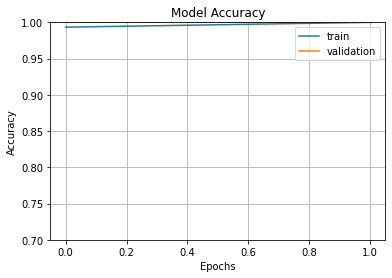

In [17]:
# Model Accuracy
fig1 = plt.gcf()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.7, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

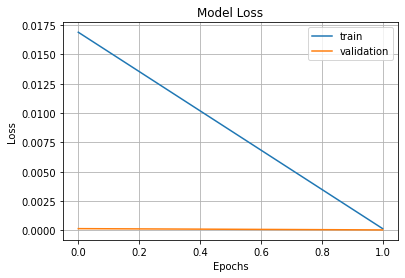

In [18]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## Prediction

In [23]:
# for upload image
from google.colab import files
uploaded = files.upload()
uploaded.keys()

Saving banana.jpg to banana (1).jpg


dict_keys(['banana.jpg'])

ภาพที่อัพโหลดขึ้นมาคือ banana.jpg


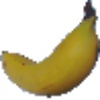

In [27]:
import cv2
from google.colab.patches import cv2_imshow
print("ภาพที่อัพโหลดขึ้นมาคือ", list(uploaded)[0])
upload_img = list(uploaded)[0]
image = cv2.imread(upload_img)
# print(image)
cv2_imshow(image)

In [24]:
img = cv2.resize(image, (200, 200), interpolation=cv2.INTER_AREA)
img = np.expand_dims(img, axis=0)
print(img.shape)

(1, 200, 200, 3)


In [25]:
pred = resnet_model.predict(img)
print(pred)

[[1.0090251e-13 1.0000000e+00 5.8380398e-18]]


In [26]:
output_class = class_names[np.argmax(pred)]
print("This is ", output_class)

This is  Banana


## Deploy Model

In [29]:
resnet_model.save('ABTFruitModel', save_format='h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


NotImplementedError: ignored